In [6]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
import numpy as np


In [7]:
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

batch_size = 128

train_data = datasets.MNIST(root='./data', train=True, download=True, transform=transform)
train_loader = DataLoader(train_data, batch_size=batch_size, shuffle=True)


100.0%
100.0%
100.0%
100.0%


In [8]:
class Generator(nn.Module):
    def __init__(self):
        super(Generator, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(100, 256),
            nn.ReLU(True),
            nn.Linear(256, 512),
            nn.ReLU(True),
            nn.Linear(512, 1024),
            nn.ReLU(True),
            nn.Linear(1024, 28*28),
            nn.Tanh()
        )

    def forward(self, z):
        return self.model(z).view(-1, 1, 28, 28)

class Discriminator(nn.Module):
    def __init__(self):
        super(Discriminator, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(28*28, 512),
            nn.LeakyReLU(0.2),
            nn.Linear(512, 256),
            nn.LeakyReLU(0.2),
            nn.Linear(256, 1),
            nn.Sigmoid()
        )

    def forward(self, img):
        return self.model(img.view(img.size(0), -1))


In [11]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

G = Generator().to(device)
D = Discriminator().to(device)

loss_function = nn.BCELoss()
lr = 0.0002

optimizer_G = optim.Adam(G.parameters(), lr=lr)
optimizer_D = optim.Adam(D.parameters(), lr=lr)


In [14]:
 #import time

epochs = 50
for epoch in range(epochs):
    for i, (real_imgs, _) in enumerate(train_loader):
        batch_size = real_imgs.size(0)
        real_imgs = real_imgs.to(device)

        # Labels
        real = torch.ones(batch_size, 1).to(device)
        fake = torch.zeros(batch_size, 1).to(device)

        # Train Discriminator
        z = torch.randn(batch_size, 100).to(device)
        fake_imgs = G(z)

        real_loss = loss_function(D(real_imgs), real)
        fake_loss = loss_function(D(fake_imgs.detach()), fake)
        d_loss = real_loss + fake_loss

        optimizer_D.zero_grad()
        d_loss.backward()
        optimizer_D.step()

        # Train Generator
        z = torch.randn(batch_size, 100).to(device)
        fake_imgs = G(z)
        g_loss = loss_function(D(fake_imgs), real)

        optimizer_G.zero_grad()
        g_loss.backward()
        optimizer_G.step()

    print(f"[Epoch {epoch+1}/{epochs}] D_loss: {d_loss.item():.4f} | G_loss: {g_loss.item():.4f}")


[Epoch 1/50] D_loss: 0.1155 | G_loss: 5.1807
[Epoch 2/50] D_loss: 0.0216 | G_loss: 4.4863
[Epoch 3/50] D_loss: 0.3429 | G_loss: 6.4604
[Epoch 4/50] D_loss: 0.4018 | G_loss: 5.8553
[Epoch 5/50] D_loss: 0.7392 | G_loss: 1.8682
[Epoch 6/50] D_loss: 1.5318 | G_loss: 0.6810
[Epoch 7/50] D_loss: 0.8637 | G_loss: 1.4670
[Epoch 8/50] D_loss: 0.9197 | G_loss: 2.5532
[Epoch 9/50] D_loss: 0.3491 | G_loss: 3.0370
[Epoch 10/50] D_loss: 0.6422 | G_loss: 2.5878
[Epoch 11/50] D_loss: 0.7786 | G_loss: 3.9211
[Epoch 12/50] D_loss: 0.1757 | G_loss: 4.8007
[Epoch 13/50] D_loss: 0.2307 | G_loss: 4.7373
[Epoch 14/50] D_loss: 0.4989 | G_loss: 3.6902
[Epoch 15/50] D_loss: 0.1822 | G_loss: 6.3025
[Epoch 16/50] D_loss: 0.3531 | G_loss: 3.6948
[Epoch 17/50] D_loss: 0.2572 | G_loss: 4.3954
[Epoch 18/50] D_loss: 0.3748 | G_loss: 3.7718
[Epoch 19/50] D_loss: 0.8146 | G_loss: 3.4527
[Epoch 20/50] D_loss: 0.6689 | G_loss: 3.2000
[Epoch 21/50] D_loss: 0.4876 | G_loss: 2.8181
[Epoch 22/50] D_loss: 0.8273 | G_loss: 2.45

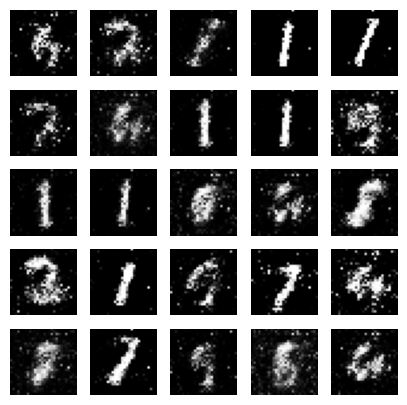

In [15]:
def show_generated_images(generator, n_images=25):
    generator.eval()
    z = torch.randn(n_images, 100).to(device)
    generated = generator(z).cpu().detach()

    grid_size = int(np.sqrt(n_images))
    fig, axs = plt.subplots(grid_size, grid_size, figsize=(5, 5))
    count = 0
    for i in range(grid_size):
        for j in range(grid_size):
            axs[i, j].imshow(generated[count].squeeze(), cmap='gray')
            axs[i, j].axis('off')
            count += 1
    plt.show()

show_generated_images(G)


[Epoch 1/50] D_loss: 0.0282 | G_loss: 5.7168
[Epoch 2/50] D_loss: 0.0152 | G_loss: 10.7716
[Epoch 3/50] D_loss: 0.3367 | G_loss: 7.0214
[Epoch 4/50] D_loss: 1.1960 | G_loss: 3.2805
[Epoch 5/50] D_loss: 1.1354 | G_loss: 3.3783
[Epoch 6/50] D_loss: 1.5225 | G_loss: 1.7562
[Epoch 7/50] D_loss: 0.6327 | G_loss: 3.8221
[Epoch 8/50] D_loss: 0.9140 | G_loss: 3.2509
[Epoch 9/50] D_loss: 1.0440 | G_loss: 2.7588
[Epoch 10/50] D_loss: 0.8445 | G_loss: 2.2511
[Epoch 11/50] D_loss: 0.4712 | G_loss: 3.5752
[Epoch 12/50] D_loss: 0.2872 | G_loss: 5.0706
[Epoch 13/50] D_loss: 0.1595 | G_loss: 5.2006
[Epoch 14/50] D_loss: 1.3879 | G_loss: 6.3403
[Epoch 15/50] D_loss: 0.3234 | G_loss: 6.6895
[Epoch 16/50] D_loss: 0.3702 | G_loss: 5.6750
[Epoch 17/50] D_loss: 0.3564 | G_loss: 3.4284
[Epoch 18/50] D_loss: 0.2311 | G_loss: 5.9390
[Epoch 19/50] D_loss: 0.2165 | G_loss: 3.3669
[Epoch 20/50] D_loss: 0.3310 | G_loss: 4.7574
[Epoch 21/50] D_loss: 0.3604 | G_loss: 6.9068
[Epoch 22/50] D_loss: 0.3290 | G_loss: 8.3

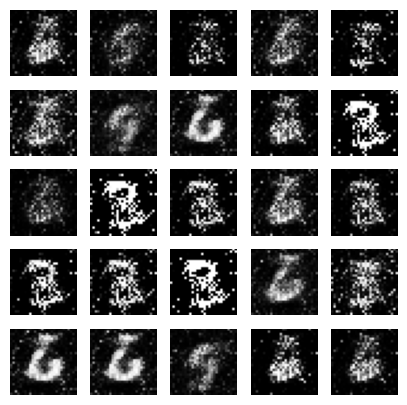

In [4]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
import numpy as np

transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

batch_size = 128
train_data = datasets.MNIST(root='./data', train=True, download=True, transform=transform)
train_loader = DataLoader(train_data, batch_size=batch_size, shuffle=True)

class Generator(nn.Module):
    def __init__(self):
        super(Generator, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(100, 256),
            nn.ReLU(True),
            nn.Linear(256, 512),
            nn.ReLU(True),
            nn.Linear(512, 1024),
            nn.ReLU(True),
            nn.Linear(1024, 28*28),
            nn.Tanh()
        )

    def forward(self, z):
        return self.model(z).view(-1, 1, 28, 28)

class Discriminator(nn.Module):
    def __init__(self):
        super(Discriminator, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(28*28, 512),
            nn.LeakyReLU(0.2),
            nn.Linear(512, 256),
            nn.LeakyReLU(0.2),
            nn.Linear(256, 1),
            nn.Sigmoid()
        )

    def forward(self, img):
        return self.model(img.view(img.size(0), -1))

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

G = Generator().to(device)
D = Discriminator().to(device)

loss_function = nn.BCELoss()
lr = 0.0002
optimizer_G = optim.Adam(G.parameters(), lr=lr)
optimizer_D = optim.Adam(D.parameters(), lr=lr)

epochs = 50
for epoch in range(epochs):
    for i, (real_imgs, _) in enumerate(train_loader):
        batch_size = real_imgs.size(0)
        real_imgs = real_imgs.to(device)

        # Labels
        real = torch.ones(batch_size, 1).to(device)
        fake = torch.zeros(batch_size, 1).to(device)

        # Train Discriminator
        z = torch.randn(batch_size, 100).to(device)
        fake_imgs = G(z)

        real_loss = loss_function(D(real_imgs), real)
        fake_loss = loss_function(D(fake_imgs.detach()), fake)
        d_loss = real_loss + fake_loss

        optimizer_D.zero_grad()
        d_loss.backward()
        optimizer_D.step()

        # Train Generator
        z = torch.randn(batch_size, 100).to(device)
        fake_imgs = G(z)
        g_loss = loss_function(D(fake_imgs), real)

        optimizer_G.zero_grad()
        g_loss.backward()
        optimizer_G.step()

    print(f"[Epoch {epoch+1}/{epochs}] D_loss: {d_loss.item():.4f} | G_loss: {g_loss.item():.4f}")

# Evaluate the Discriminator accuracy
def evaluate_discriminator_accuracy():
    G.eval()
    D.eval()

    real_correct = 0
    fake_correct = 0
    total = 0

    with torch.no_grad():
        for real_imgs, _ in train_loader:
            batch_size = real_imgs.size(0)
            real_imgs = real_imgs.to(device)
            real_labels = torch.ones(batch_size, 1).to(device)
            fake_labels = torch.zeros(batch_size, 1).to(device)

            z = torch.randn(batch_size, 100).to(device)
            fake_imgs = G(z)

            real_preds = D(real_imgs)
            fake_preds = D(fake_imgs)

            real_correct += (real_preds >= 0.5).sum().item()
            fake_correct += (fake_preds < 0.5).sum().item()
            total += batch_size * 2

    accuracy = (real_correct + fake_correct) / total * 100
    print(f"Discriminator Accuracy: {accuracy:.2f}%")

# After training, evaluate the Discriminator's accuracy
evaluate_discriminator_accuracy()

# Show generated images
def show_generated_images(generator, n_images=25):
    generator.eval()
    z = torch.randn(n_images, 100).to(device)
    generated = generator(z).cpu().detach()

    grid_size = int(np.sqrt(n_images))
    fig, axs = plt.subplots(grid_size, grid_size, figsize=(5, 5))
    count = 0
    for i in range(grid_size):
        for j in range(grid_size):
            axs[i, j].imshow(generated[count].squeeze(), cmap='gray')
            axs[i, j].axis('off')
            count += 1
    plt.show()

show_generated_images(G)
